<a href="https://www.kaggle.com/code/mikedelong/iris-data-with-outlier-factors?scriptVersionId=244569466" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

We're going to play with the iris data, so let's load up the dataset from sklearn.

In [1]:
from sklearn.datasets import load_iris

iris_df = load_iris(as_frame=True).frame

Next let's add the outlier factor and negative outlier factor, based on a relatively small number of neighbors. The outlier factor is binary, and the negative outlier factor is a float.

In [2]:
from sklearn.neighbors import LocalOutlierFactor

COLUMNS = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)', ]

clf = LocalOutlierFactor(n_neighbors=3)
iris_df['factor'] = clf.fit_predict(X=iris_df[COLUMNS])
iris_df['negative factor'] = clf.negative_outlier_factor_

Next let's use dimensionality reduction to get x/y coordinates from our iris data that will let us plot the data somewhat meaningfully. Let's try using TSNE with a moderate perplexity.

In [3]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=20.0)
iris_df[['x', 'y']] = tsne.fit_transform(X=iris_df[COLUMNS])

Now we're ready to plot.

<Axes: xlabel='x', ylabel='y'>

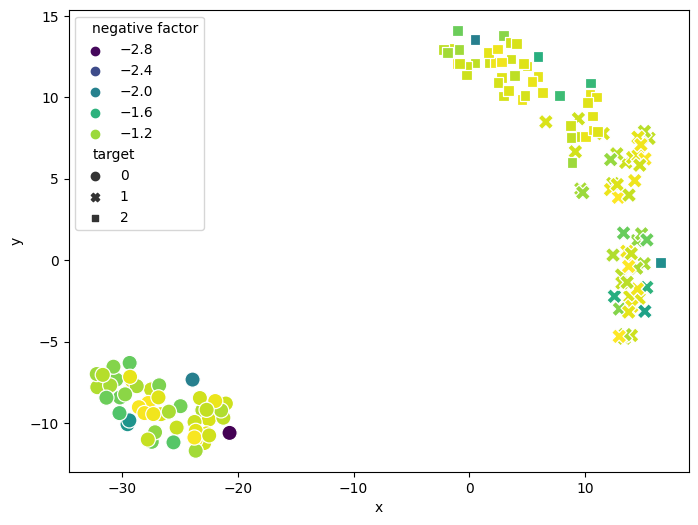

In [4]:
from seaborn import scatterplot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
scatterplot(data=iris_df, x='x', y='y', hue='negative factor', palette='viridis', style='target', s=120)

What do we see? One of our species is isolate; the other two are somewhat mingled, having instances that overlap, even though most of the instances in classes 1 and 2 mostly have neighbors in the same class. Unfortunately our outlier factor does a poor job of identifying difficult cases.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='negative factor', ylabel='Count'>

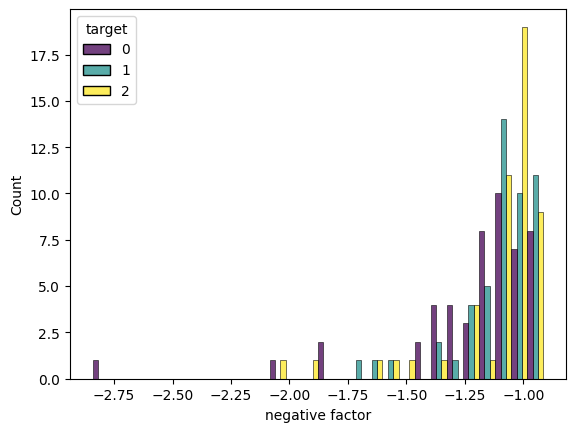

In [5]:
from seaborn import histplot
histplot(data=iris_df, x='negative factor', hue='target', palette='viridis', multiple='dodge')